<a href="https://colab.research.google.com/github/NabhyaIoT2026/Brain_Tumor/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035 (from 1)
Receiving objects: 100% (3039/3039), 79.25 MiB | 14.38 MiB/s, done.
Updating files: 100% (3264/3264), done.


In [2]:
!pwd

/content


In [3]:
!pip install tensorflow


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np
import random
import os
from tqdm import tqdm
import pickle
import cv2

In [5]:
# Define necessary constants
TEST_DIR = '/content/Brain-Tumor-Classification-DataSet/Testing'
TRAIN_DIR = '/content/Brain-Tumor-Classification-DataSet/Training'
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])

    random.shuffle(training_data)

create_training_data()
#np.save('train_data.npy', training_data)
print(len(training_data))

print("train")
print()
X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

100%|██████████| 827/827 [00:01<00:00, 418.94it/s]


2870
train



In [7]:
# Creating testing dataset
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          testing_data.append([new_array, class_num])

    random.shuffle(testing_data)

create_testing_data()
#np.save('testing_data.npy', testing_data)
print(len(testing_data))

print("testing")
print()
X_test= np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

100%|██████████| 74/74 [00:01<00:00, 67.68it/s]


394
testing



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np


Model 1:VGG16


In [9]:
tensorboard = TensorBoard(log_dir='./VGG16logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [10]:
# We'll use VGG16 to quickly define a model
vgg16_model = vgg16.VGG16()
vgg16_model.summary()
type(vgg16_model)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

keras.src.models.functional.Functional

In [11]:

# Dropping last layers
model = Sequential()
for layer in vgg16_model.layers[:-3]:
    model.add(layer)


for layer in model.layers:
    layer.trainable = True

# Adding last Dense Layer
model.add(Dense(4,activation = 'softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 14,815,044 (56.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [13]:

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [14]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 119s 841ms/step - accuracy: 0.3069 - loss: 1.5590
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 70s 469ms/step - accuracy: 0.5488 - loss: 0.9988
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 469ms/step - accuracy: 0.6463 - loss: 0.8138
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 469ms/step - accuracy: 0.6969 - loss: 0.6862
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 468ms/step - accuracy: 0.7445 - loss: 0.6070
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.7554 - loss: 0.5842
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.8014 - loss: 0.5040
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.8284 - loss: 0.4248
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 467ms/step - accuracy: 0.8506 - loss: 0.3961
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 466ms/step - accuracy: 0.8672 - loss: 0.3456
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 466ms/step - accuracy: 0.8846 - loss: 0.3167
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8

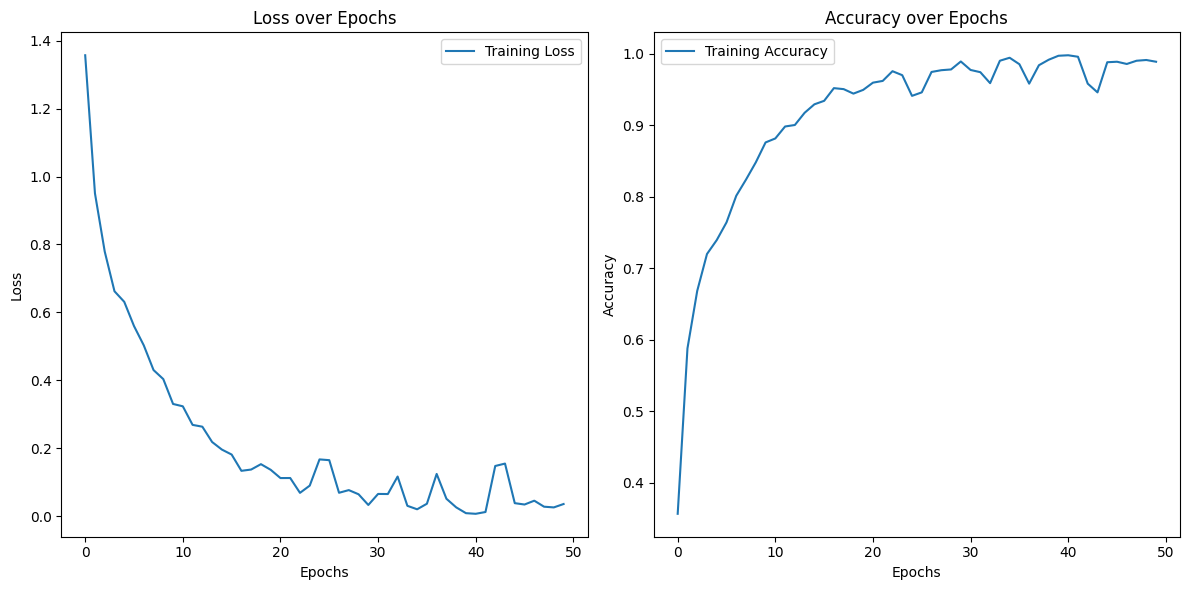

In [15]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:

# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 720ms/step - accuracy: 0.7712 - loss: 5.1714
Test loss: 5.518772125244141
Test accuracy: 0.7664974331855774


In [17]:
model.save("model.h5") # replace model.h5 in "Runner"

In [18]:

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 292ms/step
              precision    recall  f1-score   support

           0       1.00      0.19      0.32       100
           1       0.78      0.99      0.87       115
           2       0.69      1.00      0.82       105
           3       0.84      0.86      0.85        74

    accuracy                           0.77       394
   macro avg       0.83      0.76      0.72       394
weighted avg       0.82      0.77      0.71       394



Model 2: InceptionV3

In [19]:
from keras.applications import InceptionV3

In [20]:
# Load the InceptionV3 model without the top layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [21]:
# Build the model
model_inception = Sequential()
model_inception.add(inception_model)
model_inception.add(Flatten())
model_inception.add(Dense(256, activation='relu'))
model_inception.add(Dense(4, activation='softmax'))

In [22]:
# Freeze base InceptionV3 layers
for layer in inception_model.layers:
    layer.trainable = False

In [23]:
# Compile the model
model_inception.compile(loss='sparse_categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

In [24]:
# Train the model
history_inception = model_inception.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 316ms/step - accuracy: 0.5736 - loss: 13.2874 - val_accuracy: 0.6574 - val_loss: 1.6261
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8773 - loss: 0.3851 - val_accuracy: 0.7208 - val_loss: 1.8335
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9434 - loss: 0.1775 - val_accuracy: 0.7056 - val_loss: 1.6821
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9705 - loss: 0.0818 - val_accuracy: 0.7614 - val_loss: 1.7172
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9942 - loss: 0.0267 - val_accuracy: 0.7208 - val_loss: 1.9086
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9715 - loss: 0.0996 - val_accuracy: 0.8147 - val_loss: 1.3436
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9948 - loss: 0.0290 - val_accuracy: 0.8071 - val_loss: 1.4113
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.9971 - loss: 0.0152 - val_accuracy: 0.

In [25]:
model_inception.save('model_InceptionV3.h5')

Model 3: EfficientNetB0

In [26]:
from keras.applications import EfficientNetB0

# Load the EfficientNetB0 model without the top layers
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [27]:
# Build the model
model_efficientnet = Sequential()
model_efficientnet.add(efficientnet_model)
model_efficientnet.add(Flatten())
model_efficientnet.add(Dense(256, activation='relu'))
model_efficientnet.add(Dense(4, activation='softmax'))

In [28]:
# Freeze base EfficientNetB0 layers
for layer in efficientnet_model.layers:
    layer.trainable = False

# Compile the model
model_efficientnet.compile(loss='sparse_categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

In [29]:
# Train the model
history_efficientnet = model_efficientnet.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 65s 436ms/step - accuracy: 0.2659 - loss: 10.3617 - val_accuracy: 0.1878 - val_loss: 1.8755
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.2610 - loss: 2.9230 - val_accuracy: 0.1878 - val_loss: 3.1431
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2723 - loss: 2.4883 - val_accuracy: 0.1878 - val_loss: 2.3846
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.2482 - loss: 2.5402 - val_accuracy: 0.1878 - val_loss: 1.6438
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2622 - loss: 1.7307 - val_accuracy: 0.1878 - val_loss: 2.2443
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2750 - loss: 1.8457 - val_accuracy: 0.1878 - val_loss: 2.2854
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2733 - loss: 1.8471 - val_accuracy: 0.2538 - val_loss: 1.7718
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2728 - loss: 1.5419 - val_accuracy: 0.2919

In [30]:
model_efficientnet.save('model_EfficientNetB0.h5')

Comparisons

Plotting Training and Validation Accuracy/Loss

In [31]:
def plot_metrics(history, model_name):
    # Get training and validation metrics (if available)
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


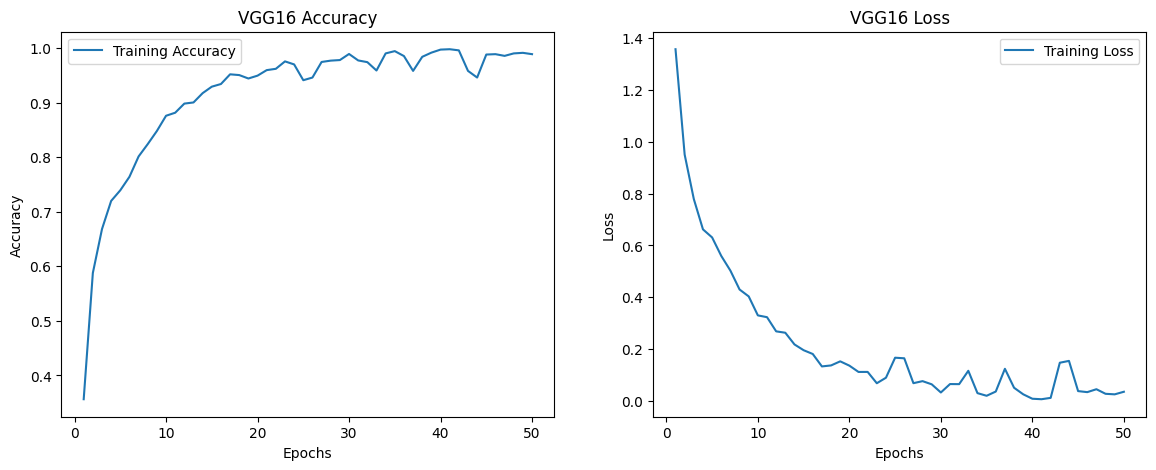

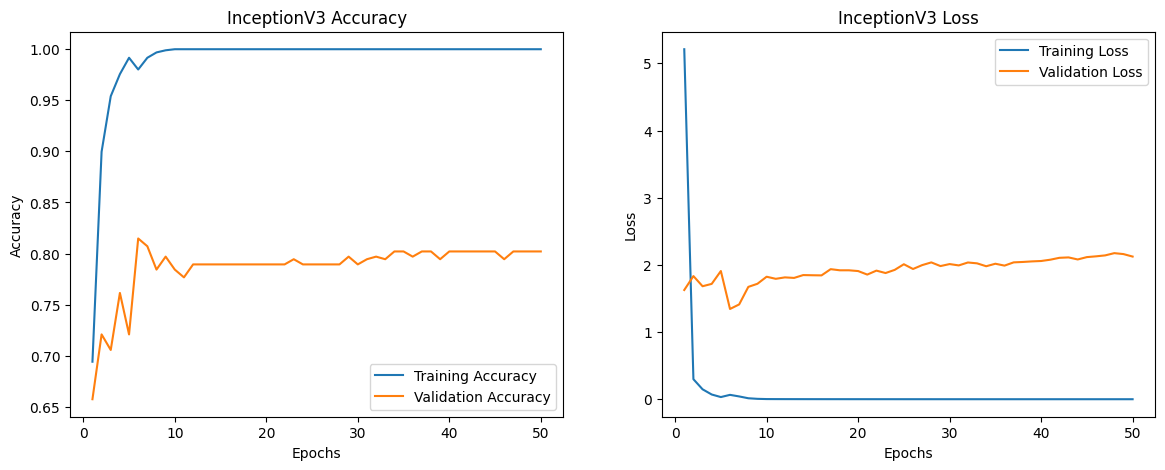

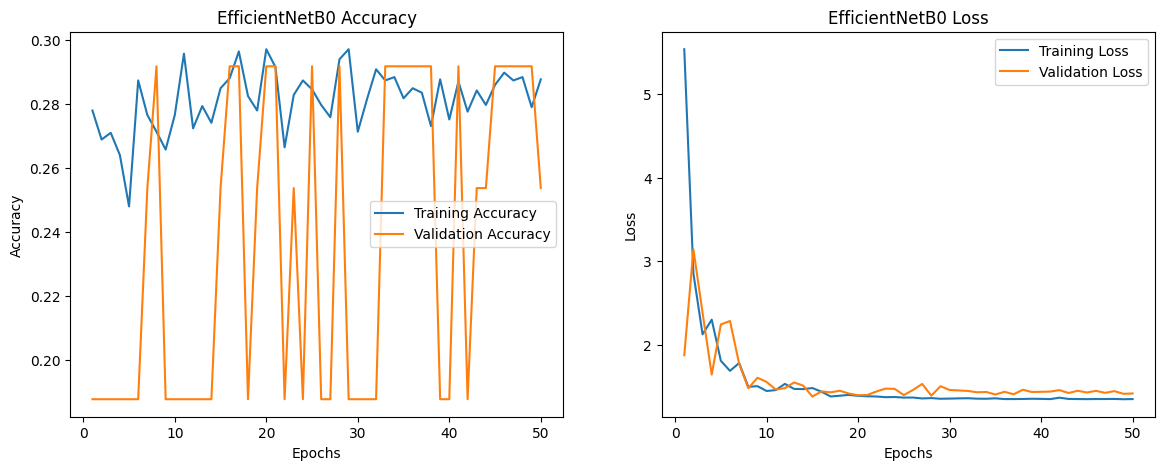

In [32]:
# Plotting metrics for VGG16
plot_metrics(history, "VGG16")

# Plotting metrics for InceptionV3
plot_metrics(history_inception, "InceptionV3")

# Plotting metrics for EfficientNetB0
plot_metrics(history_efficientnet, "EfficientNetB0")

Overlayed Accuracy and Loss Comparison

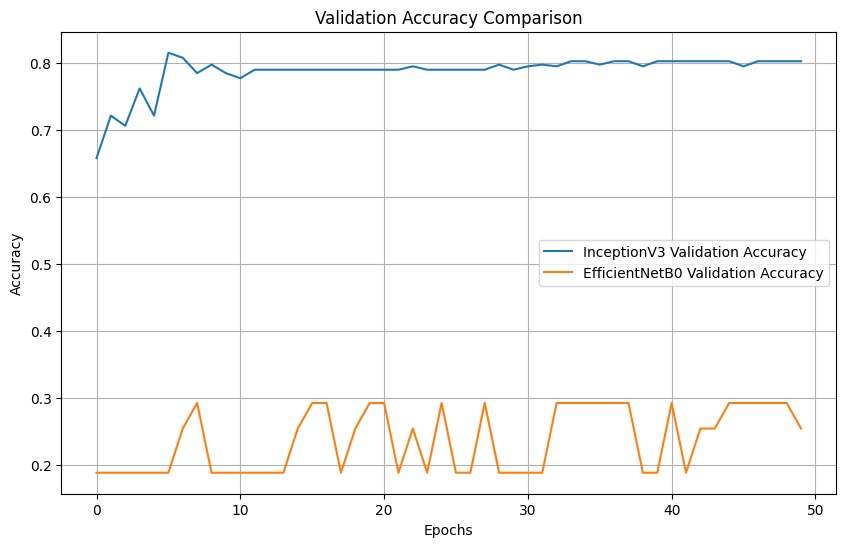

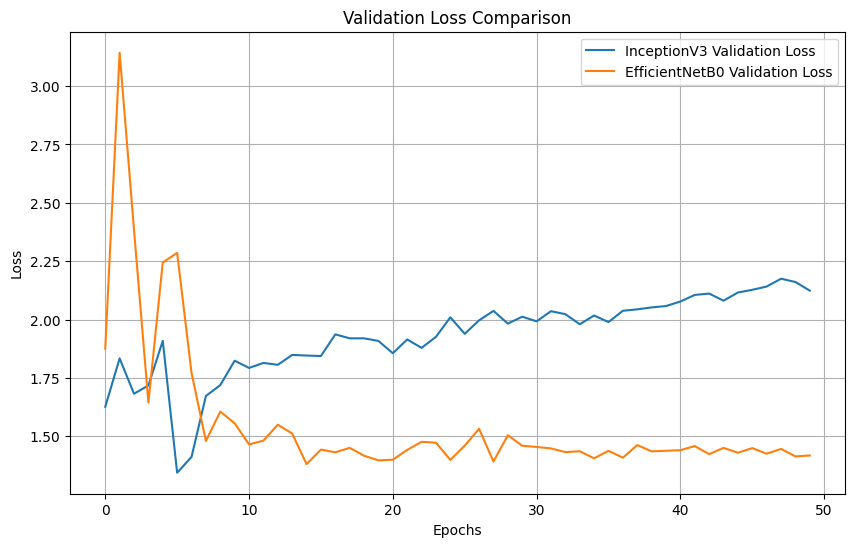

In [33]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))

# VGG16 Training Accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='VGG16 Training Accuracy')

# InceptionV3 Training Accuracy
if 'accuracy' in history_inception.history:
    plt.plot(history_inception.history['accuracy'], label='InceptionV3 Training Accuracy')

# EfficientNetB0 Training Accuracy
if 'accuracy' in history_efficientnet.history:
    plt.plot(history_efficientnet.history['accuracy'], label='EfficientNetB0 Training Accuracy')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 6))

# VGG16 Training Loss
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='VGG16 Training Loss')

# InceptionV3 Training Loss
if 'loss' in history_inception.history:
    plt.plot(history_inception.history['loss'], label='InceptionV3 Training Loss')

# EfficientNetB0 Training Loss
if 'loss' in history_efficientnet.history:
    plt.plot(history_efficientnet.history['loss'], label='EfficientNetB0 Training Loss')

plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [35]:
# VGG16 Test Accuracy
vgg16_test_loss, vgg16_test_accuracy = model.evaluate(X_test, Y_test)
print(f'VGG16 Test Accuracy: {vgg16_test_accuracy * 100:.2f}%')

# InceptionV3 Test Accuracy
inception_test_loss, inception_test_accuracy = model_inception.evaluate(X_test, Y_test)
print(f'InceptionV3 Test Accuracy: {inception_test_accuracy * 100:.2f}%')

# EfficientNetB0 Test Accuracy
efficientnet_test_loss, efficientnet_test_accuracy = model_efficientnet.evaluate(X_test, Y_test)
print(f'EfficientNetB0 Test Accuracy: {efficientnet_test_accuracy * 100:.2f}%')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7712 - loss: 5.1714
VGG16 Test Accuracy: 76.65%
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8242 - loss: 1.9867
InceptionV3 Test Accuracy: 80.20%
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2491 - loss: 1.4217
EfficientNetB0 Test Accuracy: 25.38%
